In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
zip_file_path = '/content/drive/My Drive/facial_recog/dataset.zip'

In [3]:
import zipfile
import os

unzip_dir = '/content/drive/My Drive/unzipped_folder'

os.makedirs(unzip_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Files unzipped to {unzip_dir}")


Files unzipped to /content/drive/My Drive/unzipped_folder


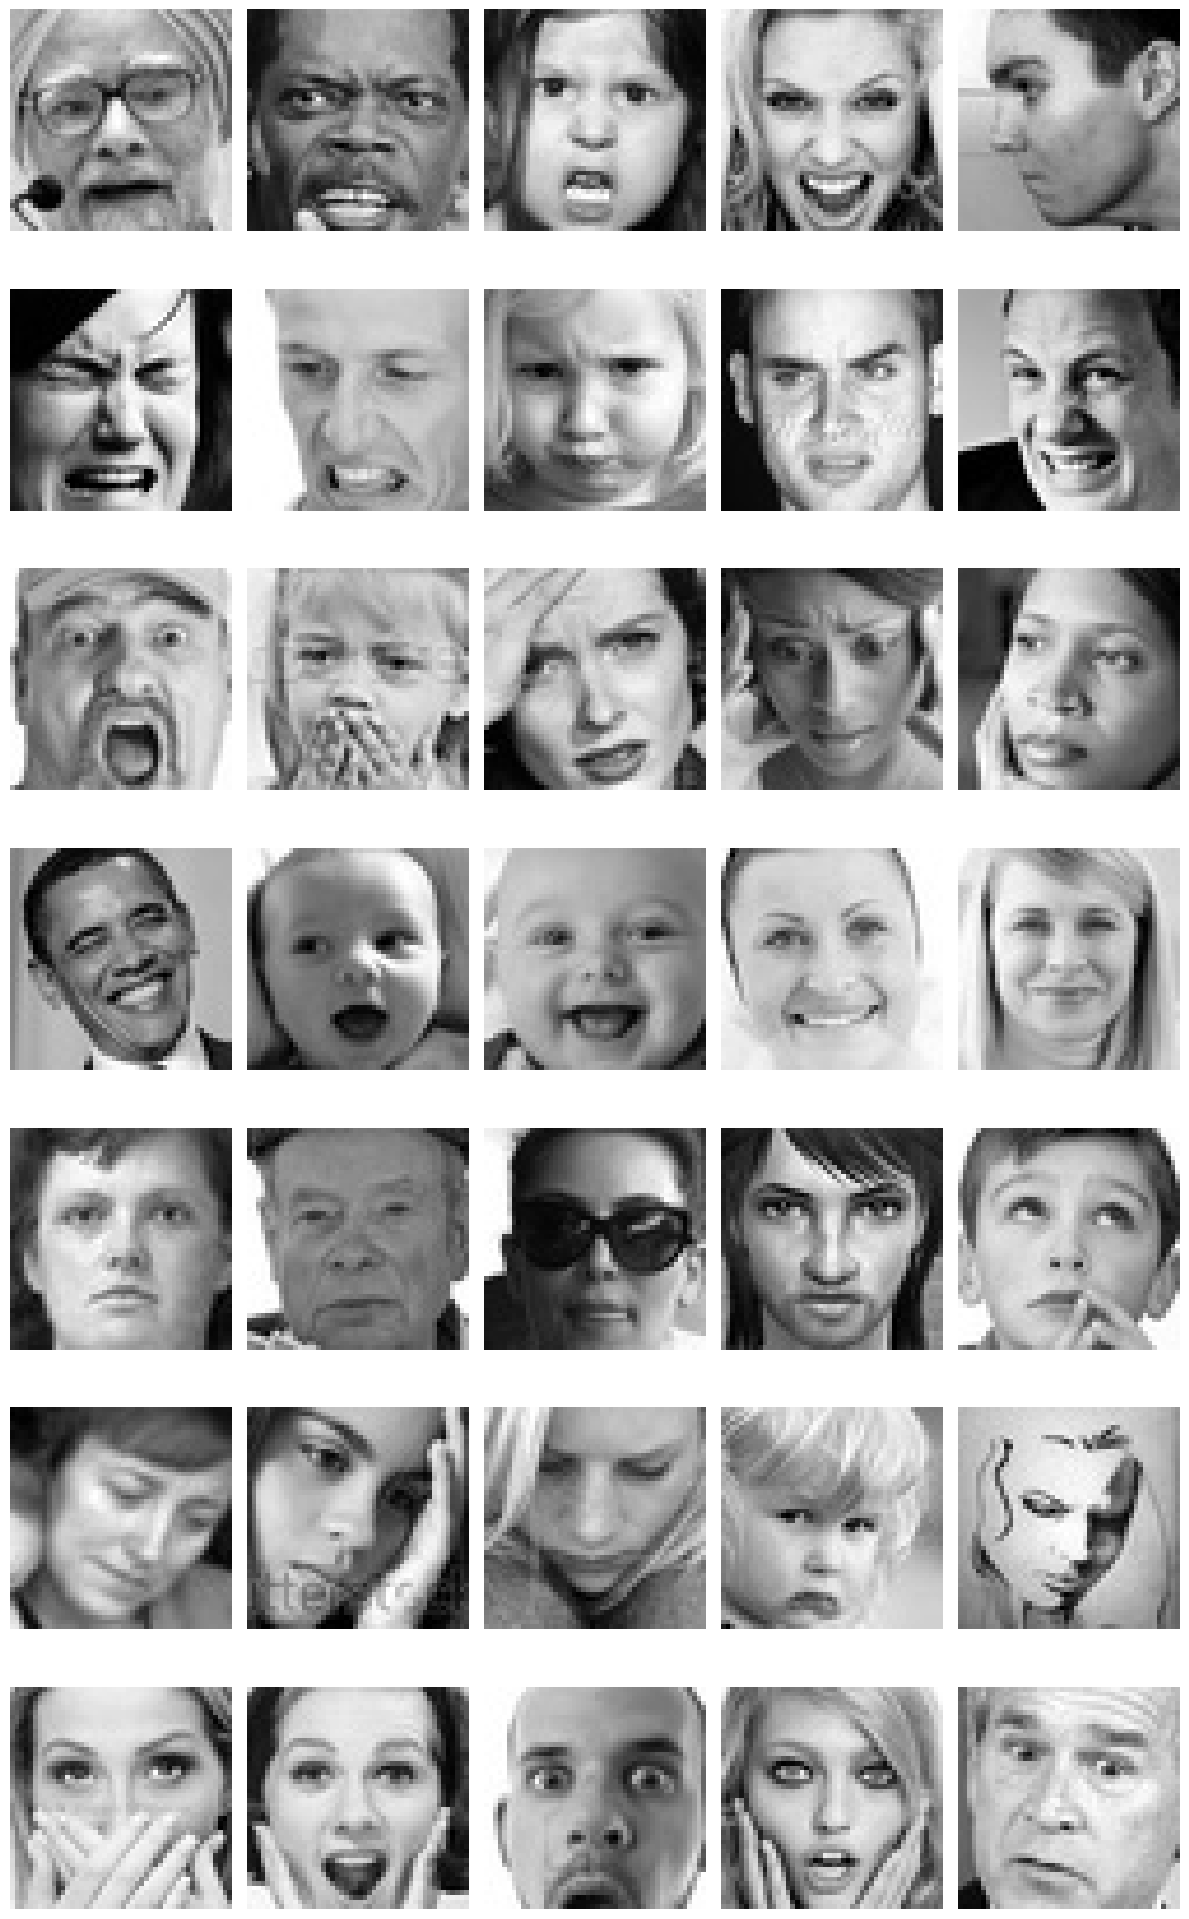

In [4]:
import numpy as np
import seaborn as sns
import cv2
# from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = unzip_dir + "/images/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img_path = os.path.join(base_path, "train", expression, os.listdir(os.path.join(base_path, "train", expression))[i])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (pic_size, pic_size))

        plt.imshow(img_resized, cmap="gray")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Checking the number of images for each category

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [7]:
!pip install Augmentor

In [8]:
import Augmentor
import os

train_dir = os.path.join(base_path, "train")

# Define the output directory where augmented images will be saved
output_dir = base_path + "augmented_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the target number of images (maximum in your current dataset)
target_num = max(3993, 436, 4103, 7164, 4982, 4938, 3205)

# Define a dictionary to store the number of images in each class
class_counts = {
    "angry": 3993,
    "disgust": 436,
    "fear": 4103,
    "happy": 7164,
    "neutral": 4982,
    "sad": 4938,
    "surprise": 3205
}

# Augmentation operations to be applied
def create_augmentor_pipeline(class_path, output_class_dir):
    p = Augmentor.Pipeline(source_directory=class_path, output_directory=output_class_dir)
    p.flip_left_right(probability=0.5)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
    return p

# Looping through each class and augmenting images
for class_name, current_num in class_counts.items():
    class_path = os.path.join(train_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)

    # Creating output directory for each class if it doesn't exist
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    p = create_augmentor_pipeline(class_path, output_class_dir)

    # Calculating the number of images to generate
    images_to_generate = target_num - current_num

    if images_to_generate > 0:
        # Augment and save the images
        p.sample(images_to_generate)

print("Augmentation completed! Images saved to:", output_dir)


Initialised with 3993 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/angry.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C17FAE7BD60>: 100%|██████████| 3171/3171 [00:51<00:00, 61.66 Samples/s]


Initialised with 436 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/disgust.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C17EC0CFC70>: 100%|██████████| 6728/6728 [01:38<00:00, 68.08 Samples/s]


Initialised with 4103 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/fear.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C18432FF130>: 100%|██████████| 3061/3061 [00:57<00:00, 53.22 Samples/s]


Initialised with 7164 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/happy.Initialised with 4982 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/neutral.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C17FAF31630>: 100%|██████████| 2182/2182 [00:30<00:00, 71.43 Samples/s]


Initialised with 4938 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/sad.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C17EC12FEB0>: 100%|██████████| 2226/2226 [00:30<00:00, 73.08 Samples/s]


Initialised with 3205 image(s) found.
Output directory set to /content/drive/My Drive/unzipped_folder/images/images/augmented_images/surprise.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7C17FB109120>: 100%|██████████| 3959/3959 [01:04<00:00, 61.78 Samples/s]

Augmentation completed! Images saved to: /content/drive/My Drive/unzipped_folder/images/images/augmented_images


In [9]:
# Checking the number of images for each category after augmentation

for expression in os.listdir(output_dir):
    print(str(len(os.listdir(output_dir + "/" +expression))) + " " + expression + " images")

3171 angry images
6728 disgust images
3061 fear images
0 happy images
2182 neutral images
2226 sad images
3959 surprise images


In [10]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [33]:
batch_size = 128


In [34]:
transform = transforms.Compose([
    transforms.Resize((pic_size, pic_size)),  # Resizing images to (pic_size, pic_size)
    transforms.Grayscale(),                   # Images to grayscale
    transforms.ToTensor()                     # Images to PyTorch tensors
])


In [35]:

# Load the datasets
train_dataset = datasets.ImageFolder(root=base_path + "train", transform=transform)
validation_dataset = datasets.ImageFolder(root=base_path + "validation", transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


In [36]:
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)

        return out


In [37]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=7):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


In [38]:
def create_resnet18(num_classes=7):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes)

# Instantiate the model
model = create_resnet18(num_classes=7)


In [39]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
device

device(type='cuda')

In [42]:
num_epochs = 25
from tqdm import tqdm
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

  4%|▍         | 1/25 [01:50<44:09, 110.40s/it]

Epoch [1/25], Loss: 1.5570


  8%|▊         | 2/25 [03:38<41:49, 109.12s/it]

Epoch [2/25], Loss: 1.2794


 12%|█▏        | 3/25 [05:26<39:50, 108.64s/it]

Epoch [3/25], Loss: 1.0338


 16%|█▌        | 4/25 [07:14<37:51, 108.18s/it]

Epoch [4/25], Loss: 0.7798


 20%|██        | 5/25 [09:02<36:04, 108.24s/it]

Epoch [5/25], Loss: 0.5277


 24%|██▍       | 6/25 [10:49<34:10, 107.93s/it]

Epoch [6/25], Loss: 0.3394


 28%|██▊       | 7/25 [12:36<32:17, 107.67s/it]

Epoch [7/25], Loss: 0.2373


 32%|███▏      | 8/25 [14:25<30:34, 107.90s/it]

Epoch [8/25], Loss: 0.1885


 36%|███▌      | 9/25 [16:16<29:03, 108.99s/it]

Epoch [9/25], Loss: 0.1488


 40%|████      | 10/25 [18:06<27:16, 109.13s/it]

Epoch [10/25], Loss: 0.1201


 44%|████▍     | 11/25 [19:56<25:34, 109.63s/it]

Epoch [11/25], Loss: 0.1209


 48%|████▊     | 12/25 [21:47<23:47, 109.79s/it]

Epoch [12/25], Loss: 0.1023


 52%|█████▏    | 13/25 [23:36<21:55, 109.59s/it]

Epoch [13/25], Loss: 0.0927


 56%|█████▌    | 14/25 [25:27<20:11, 110.14s/it]

Epoch [14/25], Loss: 0.1019


 60%|██████    | 15/25 [27:17<18:21, 110.18s/it]

Epoch [15/25], Loss: 0.0904


 64%|██████▍   | 16/25 [29:09<16:36, 110.74s/it]

Epoch [16/25], Loss: 0.0856


 68%|██████▊   | 17/25 [31:02<14:49, 111.13s/it]

Epoch [17/25], Loss: 0.0851


 72%|███████▏  | 18/25 [32:53<12:58, 111.26s/it]

Epoch [18/25], Loss: 0.0605


 76%|███████▌  | 19/25 [34:46<11:10, 111.82s/it]

Epoch [19/25], Loss: 0.0884


 80%|████████  | 20/25 [36:38<09:18, 111.73s/it]

Epoch [20/25], Loss: 0.0636


 84%|████████▍ | 21/25 [38:57<08:00, 120.03s/it]

Epoch [21/25], Loss: 0.0800


 88%|████████▊ | 22/25 [40:42<05:46, 115.51s/it]

Epoch [22/25], Loss: 0.0680


 92%|█████████▏| 23/25 [42:25<03:43, 111.86s/it]

Epoch [23/25], Loss: 0.0623


 96%|█████████▌| 24/25 [44:09<01:49, 109.24s/it]

Epoch [24/25], Loss: 0.0875


100%|██████████| 25/25 [45:52<00:00, 110.09s/it]

Epoch [25/25], Loss: 0.0609


In [43]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    return all_labels, all_preds

def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy: 0.5129
Precision: 0.5232
Recall: 0.5129
F1 Score: 0.5146


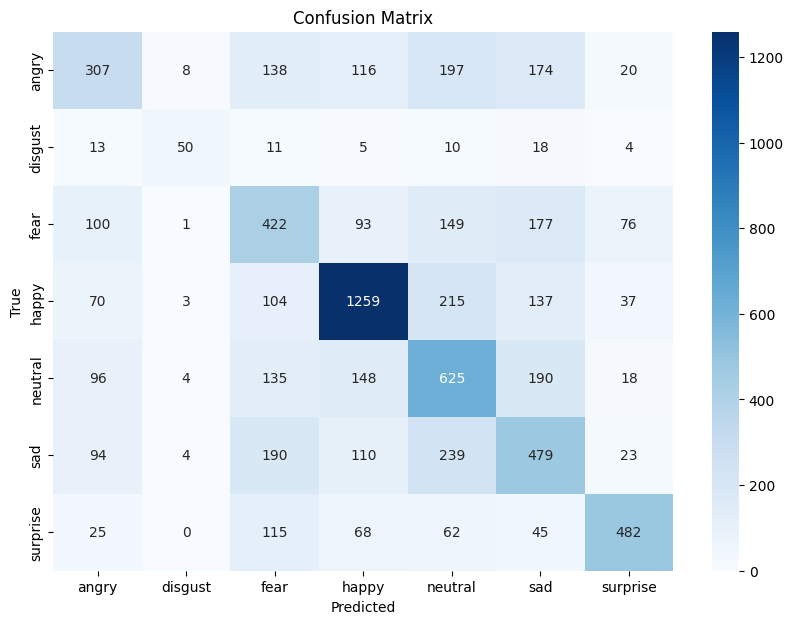

In [44]:
# Evaluating the model
y_true, y_pred = evaluate_model(model, validation_loader, device)

print_evaluation_metrics(y_true, y_pred)

# confusion matrix
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(y_true, y_pred, class_names)


In [46]:
model_path = '/content/drive/My Drive/facial_recog/facial_recod_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/facial_recog/facial_recod_model.pth
